In [ ]:
pip install scikit-plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/final_mapped_data.csv')
data.head()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,NO2_Maximum,SO2_Maximum,O3_1_hr_maximum,O3_8_hr_maximum,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average
0,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.000000,14.2,52,873.179322,33.194746,Indio #3,117.00,105.00,1024.53,1028.21,49.15,31.00,80.00,73.00,1.691,0.052333,0.00200,0.102667,0.0930,206.066667,31.34,2581.36,592.46,100.000000,86.000000
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.000000,14.2,52,873.179322,33.194746,Indio-Jackson Street,118.00,107.00,1024.60,1028.31,49.15,31.00,80.75,73.87,1.992,0.057000,0.00200,0.106000,0.0910,206.066667,28.80,982.50,336.00,100.000000,83.000000
2,2018,92227,187,224.6,0-17,Imperial,6.82,12,0.260618,10.4,60,873.179322,33.194746,Brawley-220 Main Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,2.917,0.055250,0.00325,0.087750,0.0755,233.780000,55.10,1321.00,411.20,97.235294,86.937500
3,2018,92231,67,59.4,0-17,Imperial,6.82,12,0.260618,10.4,60,873.179322,33.194746,Calexico-Ethel Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,5.692,0.073000,0.00700,0.103000,0.0840,233.780000,90.60,4621.60,407.60,97.235294,86.937500
4,2018,92234,44,34.6,0-17,Riverside,6.63,14,0.000000,14.2,52,873.179322,33.194746,Cathedral City,112.20,99.46,1024.53,1028.21,49.15,31.00,80.75,73.87,1.691,0.052333,0.00200,0.102667,0.0930,206.066667,31.34,2581.36,592.46,98.230769,86.076923


In [ ]:
data.shape

(641, 33)

In [ ]:
data['county'] = (data['county'] == 'Riverside').astype(int)
data= pd.concat([data, pd.get_dummies(data['Age_Group'], prefix = 'Age_Group')],axis=1)
data.drop(['Age_Group','Number_of_Asthma_ED_Visits'],axis=1, inplace=True)

In [ ]:
#Converting cities to integer values
def convert_to_int(word):
    word_dict = {'Bombay Beach':0, 'Brawley-220 Main Street':1, 'Buttercup':2, 'Cahuilla':3, 'Calexico-Ethel Street':4, 'Calipatria - Mulberry':5, 'Cathedral City':6, 'El Centro Naval Air Facility #2':7, 'El Centro-9th Street':8,
                  'Fish Creek Mountains':9, 'Imperial County Airport':10, 'Indio #3':11, 'Indio-Jackson Street':12,'Joshua Tree National Park':13, 'Joshua Tree NP-Cottonwood #2':14, 'La Quinta II':15, 'Mecca-65705 Johnson Street':16, 
                  'Mecca-66275 Martinez Road':17, 'Mecca-90-333 Avenue':18, 'Meloland':19, 'Naval Test Base':20, 'Niland-English Road':21, 'Oasis':22, 'Palm Springs Regional Airport':23, 'Palm Springs-Fire Station':24, 'Palo Verde II':25,
                  'PINYON':26, 'Salton City':27,'Salton Sea East':28,'Salton Sea Park':29, 'Seeley':30, 'Sonny Bono':31, 'Squaw Lake':32, 'Thermal South':33,'Thermal-Jacqueline Cochran Regional Airport':34,'Torres-Martinez':35,'UC-Andrade':36,
                   'Westmorland North':37,'Westmorland-W 1st Street':38}
    return word_dict[word]

data['City'] = data['City'].apply(lambda x : convert_to_int(x))

In [ ]:
def convert_to_int(word):
    word_dict= {'Riverside':1,'Imperial':0}
    return word_dict[word]



In [ ]:
dict= {'Age_Group_0-17': 'Young_population',
       'Age_Group_18+': 'Adults_population',
       'Age_Group_All Ages':'All ages'
       }

data.rename(columns= dict, inplace=True)

In [ ]:
actual_data= data.copy()
actual_data

,Year,Zip_Code,Age_Adjusted_Rate_of_Asthma_ED_V,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,NO2_Maximum,SO2_Maximum,O3_1_hr_maximum,O3_8_hr_maximum,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average,Young_population,Adults_population,All ages
0,2018,92201,46.3,1,6.63,14,0.000000,14.2,52,873.179322,33.194746,11,117.00,105.00,1024.53,1028.21,49.15,31.00,80.00,73.00,1.691,0.052333,0.00200,0.102667,0.093000,206.066667,31.340,2581.36,592.46,100.000000,86.000000,1,0,0
1,2018,92201,46.3,1,6.63,14,0.000000,14.2,52,873.179322,33.194746,12,118.00,107.00,1024.60,1028.31,49.15,31.00,80.75,73.87,1.992,0.057000,0.00200,0.106000,0.091000,206.066667,28.800,982.50,336.00,100.000000,83.000000,1,0,0
2,2018,92227,224.6,0,6.82,12,0.260618,10.4,60,873.179322,33.194746,1,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,2.917,0.055250,0.00325,0.087750,0.075500,233.780000,55.100,1321.00,411.20,97.235294,86.937500,1,0,0
3,2018,92231,59.4,0,6.82,12,0.260618,10.4,60,873.179322,33.194746,4,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,5.692,0.073000,0.00700,0.103000,0.084000,233.780000,90.600,4621.60,407.60,97.235294,86.937500,1,0,0
4,2018,92234,34.6,1,6.63,14,0.000000,14.2,52,873.179322,33.194746,6,112.20,99.46,1024.53,1028.21,49.15,31.00,80.75,73.87,1.691,0.052333,0.00200,0.102667,0.093000,206.066667,31.340,2581.36,592.46,98.230769,86.076923,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2013,92274,34.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,35,117.00,99.00,1035.37,1037.90,55.50,36.90,77.00,73.57,2.437,0.038667,0.00200,0.103000,0.092333,141.300000,33.900,507.90,120.10,100.000000,97.000000,0,0,1
637,2013,92276,31.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,28,113.53,97.84,1032.19,1034.56,55.50,36.90,77.00,73.57,2.437,0.038667,0.00200,0.103000,0.092333,400.950000,23.925,666.45,182.40,98.769231,89.230769,0,0,1
638,2013,92276,31.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,13,105.00,95.00,1032.19,1034.56,55.50,36.90,77.00,73.57,2.050,0.032000,0.00200,0.091000,0.086000,400.950000,23.925,666.45,182.40,100.000000,94.000000,0,0,1
639,2013,92276,31.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,14,113.53,97.84,1032.19,1034.56,55.50,36.90,77.00,73.57,2.437,0.038667,0.00200,0.103000,0.092333,400.950000,23.925,666.45,182.40,98.769231,89.230769,0,0,1


In [ ]:
x = data.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

In [ ]:
data

,Year,Zip_Code,Age_Adjusted_Rate_of_Asthma_ED_V,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,NO2_Maximum,SO2_Maximum,O3_1_hr_maximum,O3_8_hr_maximum,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average,Young_population,Adults_population,All ages
0,1.0,0.000000,0.149236,1.0,0.079618,0.6,0.000000,0.527778,0.277778,0.0,1.000000,0.289474,0.879310,0.9400,0.401583,0.031930,0.652500,0.362162,0.651163,0.608696,0.067690,0.162667,0.000000,0.688172,0.750000,0.134596,0.078879,0.206596,0.338944,0.947368,0.725490,1.0,0.0,0.0
1,1.0,0.000000,0.149236,1.0,0.079618,0.6,0.000000,0.527778,0.277778,0.0,1.000000,0.315789,0.896552,0.9800,0.402787,0.032060,0.652500,0.362162,0.668605,0.646522,0.096387,0.200000,0.000000,0.741935,0.704545,0.134596,0.070404,0.077473,0.189987,0.947368,0.666667,1.0,0.0,0.0
2,1.0,0.072022,0.866452,0.0,0.140127,0.2,0.260618,0.000000,0.722222,0.0,1.000000,0.026316,0.886552,0.9054,0.503957,0.040144,0.603333,0.273514,0.646744,0.664348,0.184574,0.186000,0.089286,0.447581,0.352273,0.155674,0.158158,0.104810,0.233664,0.898865,0.743873,1.0,0.0,0.0
3,1.0,0.083102,0.201931,0.0,0.140127,0.2,0.260618,0.000000,0.722222,0.0,1.000000,0.105263,0.886552,0.9054,0.503957,0.040144,0.603333,0.273514,0.646744,0.664348,0.449137,0.328000,0.357143,0.693548,0.545455,0.155674,0.276610,0.371366,0.231573,0.898865,0.743873,1.0,0.0,0.0
4,1.0,0.091413,0.102172,1.0,0.079618,0.6,0.000000,0.527778,0.277778,0.0,1.000000,0.157895,0.796552,0.8292,0.401583,0.031930,0.652500,0.362162,0.668605,0.646522,0.067690,0.162667,0.000000,0.688172,0.750000,0.134596,0.078879,0.206596,0.338944,0.916329,0.726998,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0.0,0.202216,0.102574,1.0,0.585987,1.0,0.000000,0.513889,0.444444,1.0,0.089248,0.921053,0.879310,0.8200,0.588094,0.044584,0.758333,0.681081,0.581395,0.633478,0.138812,0.053333,0.000000,0.693548,0.734848,0.085336,0.087421,0.039144,0.064587,0.947368,0.941176,0.0,0.0,1.0
637,0.0,0.207756,0.090507,1.0,0.585987,1.0,0.000000,0.513889,0.444444,1.0,0.089248,0.736842,0.819483,0.7968,0.533379,0.040223,0.758333,0.681081,0.581395,0.633478,0.138812,0.053333,0.000000,0.693548,0.734848,0.282819,0.054137,0.051949,0.100772,0.925776,0.788839,0.0,0.0,1.0
638,0.0,0.207756,0.090507,1.0,0.585987,1.0,0.000000,0.513889,0.444444,1.0,0.089248,0.342105,0.672414,0.7400,0.533379,0.040223,0.758333,0.681081,0.581395,0.633478,0.101916,0.000000,0.000000,0.500000,0.590909,0.282819,0.054137,0.051949,0.100772,0.947368,0.882353,0.0,0.0,1.0
639,0.0,0.207756,0.090507,1.0,0.585987,1.0,0.000000,0.513889,0.444444,1.0,0.089248,0.368421,0.819483,0.7968,0.533379,0.040223,0.758333,0.681081,0.581395,0.633478,0.138812,0.053333,0.000000,0.693548,0.734848,0.282819,0.054137,0.051949,0.100772,0.925776,0.788839,0.0,0.0,1.0


In [ ]:
 data.describe()

,Year,Zip_Code,Age_Adjusted_Rate_of_Asthma_ED_V,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,NO2_Maximum,SO2_Maximum,O3_1_hr_maximum,O3_8_hr_maximum,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average,Young_population,Adults_population,All ages
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,0.500156,0.166447,0.201096,0.597504,0.251279,0.547894,0.260618,0.414002,0.544808,0.490175,0.417663,0.456975,0.803406,0.809778,0.503280,0.104632,0.675530,0.435532,0.602348,0.607206,0.156742,0.155326,0.137165,0.628942,0.596278,0.233696,0.116773,0.164659,0.212760,0.902879,0.773939,0.280811,0.332293,0.386895
std,0.337662,0.152571,0.170371,0.490784,0.272645,0.353685,0.394922,0.242405,0.240202,0.342604,0.411087,0.277048,0.158806,0.154130,0.158591,0.136363,0.111320,0.161183,0.101139,0.116401,0.133603,0.122994,0.146064,0.117347,0.174670,0.192697,0.116338,0.169358,0.146469,0.138947,0.128091,0.449746,0.471403,0.487420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.116343,0.083266,0.000000,0.006369,0.200000,0.000000,0.291667,0.444444,0.179326,0.089248,0.210526,0.790862,0.796800,0.461975,0.035038,0.621667,0.335135,0.581395,0.565217,0.082944,0.072000,0.071429,0.559140,0.454545,0.134596,0.046296,0.078482,0.122170,0.912281,0.719363,0.000000,0.000000,0.000000
50%,0.600000,0.146814,0.141191,1.000000,0.140127,0.600000,0.000000,0.430556,0.555556,0.378387,0.340120,0.447368,0.831552,0.840000,0.508087,0.040223,0.658333,0.410811,0.624884,0.633478,0.100995,0.162667,0.071429,0.677419,0.628788,0.196395,0.078879,0.099080,0.163106,0.929825,0.764706,0.000000,0.000000,0.000000
75%,0.800000,0.202216,0.272325,1.000000,0.366242,0.800000,0.260618,0.527778,0.666667,0.809632,0.975915,0.684211,0.896552,0.900000,0.557295,0.251952,0.758333,0.502703,0.651163,0.652174,0.184574,0.186000,0.214286,0.698925,0.734848,0.272779,0.158158,0.176197,0.257827,0.947368,0.862745,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Random Forest Regressor

In [ ]:
X=data.loc[:, data.columns!= 'Age_Adjusted_Rate_of_Asthma_ED_V']  #[0:2, 4:-1]
Y=data[['Age_Adjusted_Rate_of_Asthma_ED_V']]
Y=Y.values.reshape(-1,1)   

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # 80% training and 20% test

In [ ]:
y_train.shape

(512, 1)

In [ ]:
y_test.shape

(129, 1)

## Parameter tuning using GridSearchCV

In [ ]:
rf = RandomForestRegressor()
depth = [10,30,50,80]
features= [10,20,30]

param_grid =[{'n_estimators': [100,300,500],
            'criterion': ['mse','mae'],
             'max_depth':depth,
             'max_features':features}]
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search = grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

In [ ]:
clf = RandomForestRegressor(criterion='mse', max_depth = 10, n_estimators= 100, max_features =30, random_state = 42) 

# Train the model on training data
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9449729643154122

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))
#print('Mean absolute percentage error:', metrics.mean_absolute_percentage_error(y_test, predictions))

Mean absolute error: 0.028603542918207443
Mean squared error: 0.0021172589607082798
Root mean squared error: 0.04601368232067805
R2 score: 0.9449729643154122


# Using feature importance 

In [ ]:
clf.feature_importances_

array([0.00561007, 0.07774544, 0.12440788, 0.00402671, 0.15016144,
       0.19305493, 0.00331256, 0.00200723, 0.00679101, 0.00529961,
       0.03139371, 0.00321126, 0.00345809, 0.00314   , 0.00377703,
       0.00463611, 0.0023439 , 0.00287112, 0.00436507, 0.01462356,
       0.00416642, 0.01029773, 0.00264555, 0.00664385, 0.00314271,
       0.00731263, 0.01147424, 0.00288762, 0.00181391, 0.0029279 ,
       0.25293537, 0.02698082, 0.02053452])

In [ ]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

30    0.252935
5     0.193055
4     0.150161
2     0.124408
1     0.077745
10    0.031394
31    0.026981
32    0.020535
19    0.014624
26    0.011474
21    0.010298
25    0.007313
8     0.006791
23    0.006644
0     0.005610
9     0.005300
15    0.004636
18    0.004365
20    0.004166
3     0.004027
14    0.003777
12    0.003458
6     0.003313
11    0.003211
24    0.003143
13    0.003140
29    0.002928
27    0.002888
17    0.002871
22    0.002646
16    0.002344
7     0.002007
28    0.001814
dtype: float64

Text(0.5, 0, 'Random Forest Feature Importance')

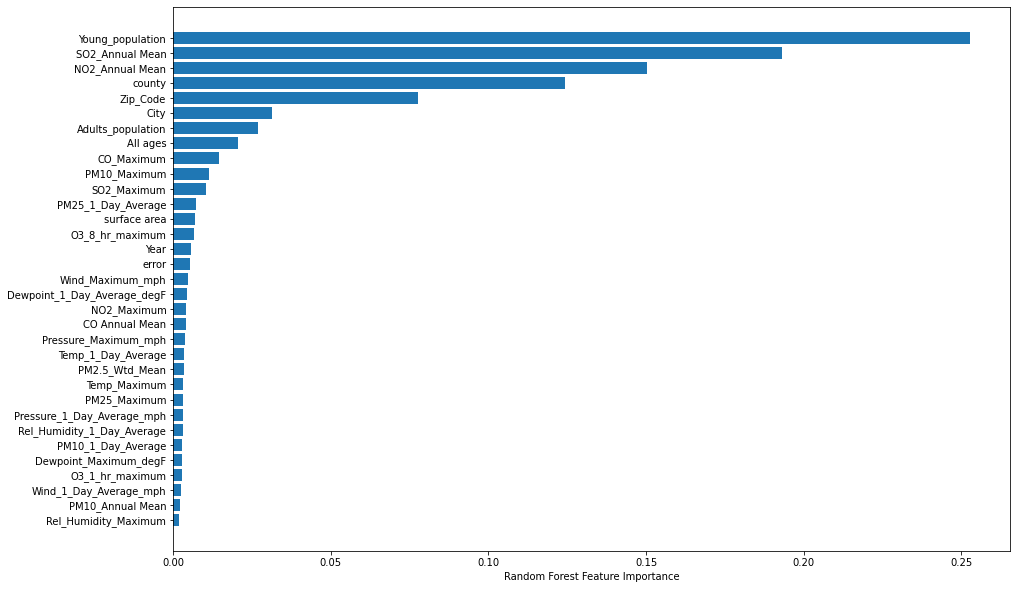

In [ ]:
sorted = clf.feature_importances_.argsort()
figure= plt.figure(figsize=(15, 10))
plt.barh(X.columns[sorted], clf.feature_importances_[sorted] )
plt.xlabel("Random Forest Feature Importance")


# After applying feature_importance

In [ ]:
X_new= X.iloc[:, [29,5,4,2,1,30,31,18,25,20,24,22,9,8,14,0,17,19,11,13]]
X_new

,Rel_Humidity_1_Day_Average,SO2_Annual Mean,NO2_Annual Mean,county,Zip_Code,Young_population,Adults_population,Dewpoint_1_Day_Average_degF,PM25_1_Day_Average,NO2_Maximum,PM25_Maximum,O3_1_hr_maximum,error,surface area,Pressure_Maximum_mph,Year,Dewpoint_Maximum_degF,CO_Maximum,Temp_Maximum,Pressure_1_Day_Average_mph
0,0.725490,0.000000,0.6,1.0,0.000000,1.0,0.0,0.608696,0.078879,0.162667,0.134596,0.688172,1.000000,0.0,0.031930,1.0,0.651163,0.067690,0.879310,0.401583
1,0.666667,0.000000,0.6,1.0,0.000000,1.0,0.0,0.646522,0.070404,0.200000,0.134596,0.741935,1.000000,0.0,0.032060,1.0,0.668605,0.096387,0.896552,0.402787
2,0.743873,0.260618,0.2,0.0,0.072022,1.0,0.0,0.664348,0.158158,0.186000,0.155674,0.447581,1.000000,0.0,0.040144,1.0,0.646744,0.184574,0.886552,0.503957
3,0.743873,0.260618,0.2,0.0,0.083102,1.0,0.0,0.664348,0.276610,0.328000,0.155674,0.693548,1.000000,0.0,0.040144,1.0,0.646744,0.449137,0.886552,0.503957
4,0.726998,0.000000,0.6,1.0,0.091413,1.0,0.0,0.646522,0.078879,0.162667,0.134596,0.688172,1.000000,0.0,0.031930,1.0,0.668605,0.067690,0.796552,0.401583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0.941176,0.000000,1.0,1.0,0.202216,0.0,0.0,0.633478,0.087421,0.053333,0.085336,0.693548,0.089248,1.0,0.044584,0.0,0.581395,0.138812,0.879310,0.588094
637,0.788839,0.000000,1.0,1.0,0.207756,0.0,0.0,0.633478,0.054137,0.053333,0.282819,0.693548,0.089248,1.0,0.040223,0.0,0.581395,0.138812,0.819483,0.533379
638,0.882353,0.000000,1.0,1.0,0.207756,0.0,0.0,0.633478,0.054137,0.000000,0.282819,0.500000,0.089248,1.0,0.040223,0.0,0.581395,0.101916,0.672414,0.533379
639,0.788839,0.000000,1.0,1.0,0.207756,0.0,0.0,0.633478,0.054137,0.053333,0.282819,0.693548,0.089248,1.0,0.040223,0.0,0.581395,0.138812,0.819483,0.533379


In [ ]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_new, Y, test_size=0.2,random_state=42)

In [ ]:
# rf = RandomForestRegressor()
# depth = [10,30,50,80]
# features= [10,20,30]

# param_grid =[{'n_estimators': [100,300,500],
#             'criterion': ['mse','mae'],
#              'max_depth':depth,
#              'max_features':features}]
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                            cv=5, n_jobs=-1, verbose=2)
# grid_search = grid_search.fit(X_train_ft,y_train_ft)
# print(grid_search.best_params_)

In [ ]:
clf_ft_imp = RandomForestRegressor(criterion='mse', max_depth = 50, n_estimators= 100, max_features =20, random_state = 42) 

# Train the model on training data
clf_ft_imp.fit(X_train_ft, y_train_ft)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
predictions = clf_ft_imp.predict(X_test_ft)
accuracy = clf_ft_imp.score(X_test_ft, y_test_ft)
accuracy

0.9453309043003774

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))
#print('Mean absolute percentage error:', metrics.mean_absolute_percentage_error(y_test, predictions))

Mean absolute error: 0.025570540856958743
Mean squared error: 0.002103486609878647
Root mean squared error: 0.045863783205037145
R2 score: 0.9453309043003773


In [ ]:
for p, e in zip(predictions, y_test_ft):
    print(f'predicted: {p}, expected: {e}, difference: {p - e}')

predicted: 0.04746580852775547, expected: [0.04545455], difference: [0.00201126]
predicted: 0.04181415929203543, expected: [0.04022526], difference: [0.0015889]
predicted: 0.6754304102976668, expected: [0.70474658], difference: [-0.02931617]
predicted: 0.062135961383749036, expected: [0.0695897], difference: [-0.00745374]
predicted: 0.23590104585679825, expected: [0.23330652], difference: [0.00259453]
predicted: 0.5822606596942881, expected: [0.59895414], difference: [-0.01669348]
predicted: 0.36040627514078766, expected: [0.38777152], difference: [-0.02736525]
predicted: 0.24005631536604966, expected: [0.19428801], difference: [0.0457683]
predicted: 0.09354786806114243, expected: [0.08447305], difference: [0.00907482]
predicted: 0.5873692679002417, expected: [0.71842317], difference: [-0.1310539]
predicted: 0.37995172968624297, expected: [0.38415125], difference: [-0.00419952]
predicted: 0.12975462590506837, expected: [0.1315366], difference: [-0.00178198]
predicted: 0.572534191472244

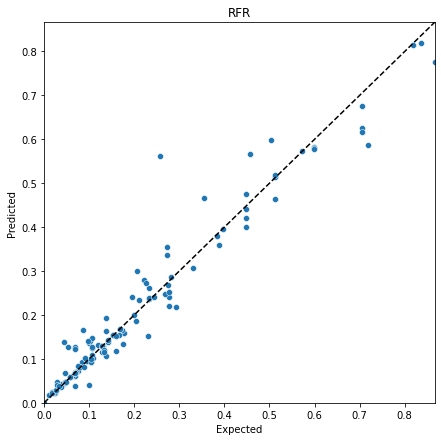

In [ ]:
df = pd.DataFrame()

df['Expected']  = pd.Series(y_test_ft.ravel())
df['Predicted'] = pd.Series(predictions)

figure = plt.figure(figsize=(7, 7))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                      palette='cool')
start = min(y_test_ft.min(), predictions.min())
end   = max(y_test_ft.max(), predictions.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)
axes.set_title('RFR')


line = plt.plot([start, end], [start, end], 'k--')

#Support Vector Regressor

## Parameter tuning using GridSearchCV

In [ ]:
parameters = {'kernel': ('linear', 'rbf','poly','sigmoid'), 'C':[1.0, 1.5, 5.0,10,100] ,'gamma': ['scale','auto'],'epsilon':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
clf = SVR()
gridsearch = GridSearchCV(clf, parameters, cv=5,scoring='neg_mean_squared_error', verbose=2 , n_jobs=-1)
gridsearch.fit(X_train,y_train.ravel())
gridsearch.best_params_

In [ ]:
svr = SVR(kernel='rbf', gamma='auto', C= 100, epsilon= 0.01)
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predictions = svr.predict(X_test)
svr.score(X_test,y_test)

0.8986275239531636

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, svr.predict(X_test)))
print('Mean squared error:', metrics.mean_squared_error(y_test, svr.predict(X_test)))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, svr.predict(X_test))))
print('R2 score:', metrics.r2_score(y_test, svr.predict(X_test)))

Mean absolute error: 0.03875464006047818
Mean squared error: 0.0039004787484757243
Root mean squared error: 0.06245381292183628
R2 score: 0.8986275239531636


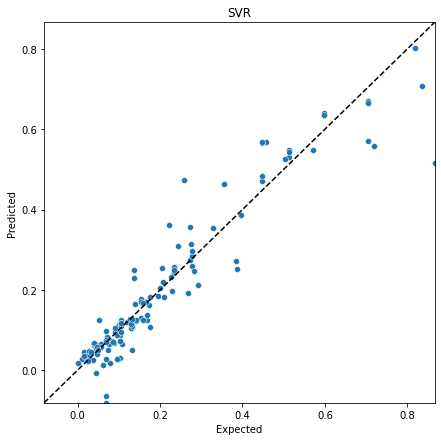

In [ ]:
df = pd.DataFrame()

df['Expected']  = pd.Series(y_test.ravel())
df['Predicted'] = pd.Series(predictions)

figure = plt.figure(figsize=(7, 7))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                      palette='cool')
start = min(y_test.min(), predictions.min())
end   = max(y_test.max(), predictions.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)
axes.set_title('SVR')

line = plt.plot([start, end], [start, end], 'k--')

#Elastic Net Regression

In [ ]:
actual_data

,Year,Zip_Code,Age_Adjusted_Rate_of_Asthma_ED_V,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,NO2_Maximum,SO2_Maximum,O3_1_hr_maximum,O3_8_hr_maximum,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average,Young_population,Adults_population,All ages
0,2018,92201,46.3,1,6.63,14,0.000000,14.2,52,873.179322,33.194746,11,117.00,105.00,1024.53,1028.21,49.15,31.00,80.00,73.00,1.691,0.052333,0.00200,0.102667,0.093000,206.066667,31.340,2581.36,592.46,100.000000,86.000000,1,0,0
1,2018,92201,46.3,1,6.63,14,0.000000,14.2,52,873.179322,33.194746,12,118.00,107.00,1024.60,1028.31,49.15,31.00,80.75,73.87,1.992,0.057000,0.00200,0.106000,0.091000,206.066667,28.800,982.50,336.00,100.000000,83.000000,1,0,0
2,2018,92227,224.6,0,6.82,12,0.260618,10.4,60,873.179322,33.194746,1,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,2.917,0.055250,0.00325,0.087750,0.075500,233.780000,55.100,1321.00,411.20,97.235294,86.937500,1,0,0
3,2018,92231,59.4,0,6.82,12,0.260618,10.4,60,873.179322,33.194746,4,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,5.692,0.073000,0.00700,0.103000,0.084000,233.780000,90.600,4621.60,407.60,97.235294,86.937500,1,0,0
4,2018,92234,34.6,1,6.63,14,0.000000,14.2,52,873.179322,33.194746,6,112.20,99.46,1024.53,1028.21,49.15,31.00,80.75,73.87,1.691,0.052333,0.00200,0.102667,0.093000,206.066667,31.340,2581.36,592.46,98.230769,86.076923,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2013,92274,34.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,35,117.00,99.00,1035.37,1037.90,55.50,36.90,77.00,73.57,2.437,0.038667,0.00200,0.103000,0.092333,141.300000,33.900,507.90,120.10,100.000000,97.000000,0,0,1
637,2013,92276,31.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,28,113.53,97.84,1032.19,1034.56,55.50,36.90,77.00,73.57,2.437,0.038667,0.00200,0.103000,0.092333,400.950000,23.925,666.45,182.40,98.769231,89.230769,0,0,1
638,2013,92276,31.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,13,105.00,95.00,1032.19,1034.56,55.50,36.90,77.00,73.57,2.050,0.032000,0.00200,0.091000,0.086000,400.950000,23.925,666.45,182.40,100.000000,94.000000,0,0,1
639,2013,92276,31.7,1,8.22,16,0.000000,14.1,55,913.295862,16.341034,14,113.53,97.84,1032.19,1034.56,55.50,36.90,77.00,73.57,2.437,0.038667,0.00200,0.103000,0.092333,400.950000,23.925,666.45,182.40,98.769231,89.230769,0,0,1


In [ ]:
# X=actual_data.loc[:, actual_data.columns!= 'Age_Adjusted_Rate_of_Asthma_ED_V']  #[0:2, 4:-1]
# Y=actual_data[['Age_Adjusted_Rate_of_Asthma_ED_V']]
# Y=Y.values.reshape(-1,1)   

# #Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # 80% training and 20% test

In [ ]:
X_train

,Year,Zip_Code,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,NO2_Maximum,SO2_Maximum,O3_1_hr_maximum,O3_8_hr_maximum,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average,Young_population,Adults_population,All ages
29,1.0,0.072022,0.0,0.140127,0.2,0.260618,0.000000,0.722222,0.000000,1.000000,0.026316,0.886552,0.9054,0.503957,0.040144,0.603333,0.273514,0.646744,0.664348,0.184574,0.186000,0.089286,0.447581,0.352273,0.155674,0.158158,0.104810,0.233664,0.898865,0.743873,0.0,1.0,0.0
148,0.8,0.168975,1.0,0.006369,0.8,0.000000,0.583333,0.555556,0.179326,0.975915,0.631579,0.586207,0.6600,0.204233,0.015619,0.820833,0.410811,0.607442,0.543478,0.000000,0.088000,0.071429,0.854839,0.840909,0.110815,0.023023,0.031585,0.056224,0.947368,0.745098,0.0,1.0,0.0
174,0.8,0.116343,0.0,0.000000,0.2,1.000000,0.263889,0.500000,0.179326,0.975915,0.210526,0.982759,0.9600,0.526497,0.040431,0.678667,0.422703,0.630698,0.648696,0.023739,0.136000,0.071429,0.806452,0.727273,0.212717,0.051718,0.078482,0.150839,0.884990,0.793541,0.0,0.0,1.0
259,0.6,0.138504,0.0,0.283439,0.0,1.000000,0.291667,0.666667,0.378387,0.340120,0.078947,0.965517,0.9400,0.492085,0.037036,0.666667,0.124324,1.000000,0.434783,0.364739,0.174000,0.232143,0.487903,0.301136,0.814299,0.419211,0.174028,0.309733,0.947368,0.843137,0.0,1.0,0.0
286,0.6,0.083102,0.0,0.283439,0.0,1.000000,0.291667,0.666667,0.378387,0.340120,0.105263,0.738966,0.7380,0.492085,0.037036,0.527667,0.412432,0.553721,0.443913,0.375632,0.416000,0.714286,0.612903,0.386364,0.814299,0.125459,0.077675,0.133531,0.858300,0.873440,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0.116343,0.0,0.140127,0.2,0.260618,0.000000,0.722222,0.000000,1.000000,0.236842,0.862069,1.0000,0.503957,0.040144,0.716667,0.459459,0.418605,0.664348,0.184574,0.186000,0.089286,0.447581,0.352273,0.155674,0.174508,0.196372,0.257827,0.929825,0.725490,0.0,0.0,1.0
106,0.8,0.091413,1.0,0.006369,0.8,0.000000,0.583333,0.555556,0.179326,0.975915,0.157895,0.790862,0.8136,0.508087,0.038577,0.820833,0.410811,0.607442,0.543478,0.082944,0.162667,0.071429,0.704301,0.734848,0.110815,0.045712,0.176197,0.166998,0.890351,0.763072,1.0,0.0,0.0
270,0.6,0.202216,1.0,0.000000,0.8,0.000000,0.513889,0.611111,0.378387,0.340120,0.710526,0.800000,0.7986,0.280970,0.020242,0.658333,0.486486,0.498140,0.572174,0.093622,0.072000,0.071429,0.602151,0.628788,0.226803,0.088338,0.082960,0.163106,0.949875,0.952381,0.0,1.0,0.0
435,0.2,0.116343,0.0,0.299363,0.2,0.260618,1.000000,0.833333,0.809632,0.000000,0.236842,0.827586,0.9400,0.752237,0.346240,0.933333,0.502703,0.465116,0.698696,0.184574,0.261333,0.261905,0.596774,0.492424,0.318147,0.277373,0.782916,0.680593,0.926635,0.829412,1.0,0.0,0.0


In [ ]:
parameters = {"max_iter": [1000,10000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "normalize": ['True','False']}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parameters, scoring='r2', cv=5,verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:   15.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1000, 10000],
                         'normalize': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=2)

In [ ]:
grid.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': 'True'}

In [ ]:
enet = ElasticNet(alpha= 0.0001, l1_ratio=0.5, max_iter =1000, normalize=True).fit(X_train, y_train)  #normalize=True

In [ ]:
enet.coef_

array([-0.04530877, -0.03754383, -0.19233828,  0.        , -0.05044266,
        0.03152779,  0.033179  ,  0.00670574,  0.05213286, -0.        ,
       -0.01985651, -0.02723032, -0.00893668, -0.        , -0.        ,
        0.00993491, -0.01412336, -0.        , -0.00944182, -0.05700186,
       -0.        , -0.18261304,  0.00850667, -0.11991532, -0.00313103,
       -0.07787425, -0.04547644,  0.05033972,  0.00935745, -0.03871732,
        0.13314276, -0.06253537, -0.        ])

In [ ]:
enet.intercept_

array([0.47382887])

In [ ]:
enet.predict(X_train)[:10]

array([0.23789692, 0.00391935, 0.31337779, 0.2623727 , 0.2474613 ,
       0.34282597, 0.30365132, 0.04837076, 0.39711157, 0.27514208])

In [ ]:
enet.predict(X_test)[:10]

array([0.06334133, 0.08197611, 0.5008293 , 0.0830976 , 0.28006441,
       0.47082022, 0.33946923, 0.22264425, 0.03047713, 0.46666814])

In [ ]:
y_pred = enet.predict(X_test)

# np.sqrt(mean_squared_error(y_test,y_pred))
# mean_squared_error = np.mean((y_pred - y_test)**2)
# print("Mean Squared Error on test set", mean_squared_error)

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean absolute error: 0.06889352172023604
Mean squared error: 0.009510424769995213
Root mean squared error: 0.09752140672690901
R2 score: 0.7528264171242208


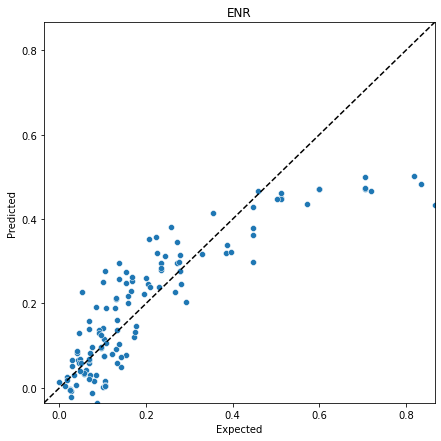

In [ ]:
df = pd.DataFrame()

df['Expected']  = pd.Series(y_test.ravel())
df['Predicted'] = pd.Series(y_pred)

figure = plt.figure(figsize=(7, 7))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                      palette='cool')
start = min(y_test.min(), y_pred.min())
end   = max(y_test.max(), y_pred.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)
axes.set_title('ENR')


line = plt.plot([start, end], [start, end], 'k--')

In [ ]:
enet_coeff = pd.DataFrame()
enet_coeff["Columns"] = X_train.columns
enet_coeff['Coefficient Estimate'] = pd.Series(enet.coef_)
enet_coeff

,Columns,Coefficient Estimate
0,Year,-0.045309
1,Zip_Code,-0.037544
2,county,-0.192338
3,CO Annual Mean,0.000000
4,NO2_Annual Mean,-0.050443
5,SO2_Annual Mean,0.031528
6,PM2.5_Wtd_Mean,0.033179
7,PM10_Annual Mean,0.006706
8,surface area,0.052133
9,error,-0.000000


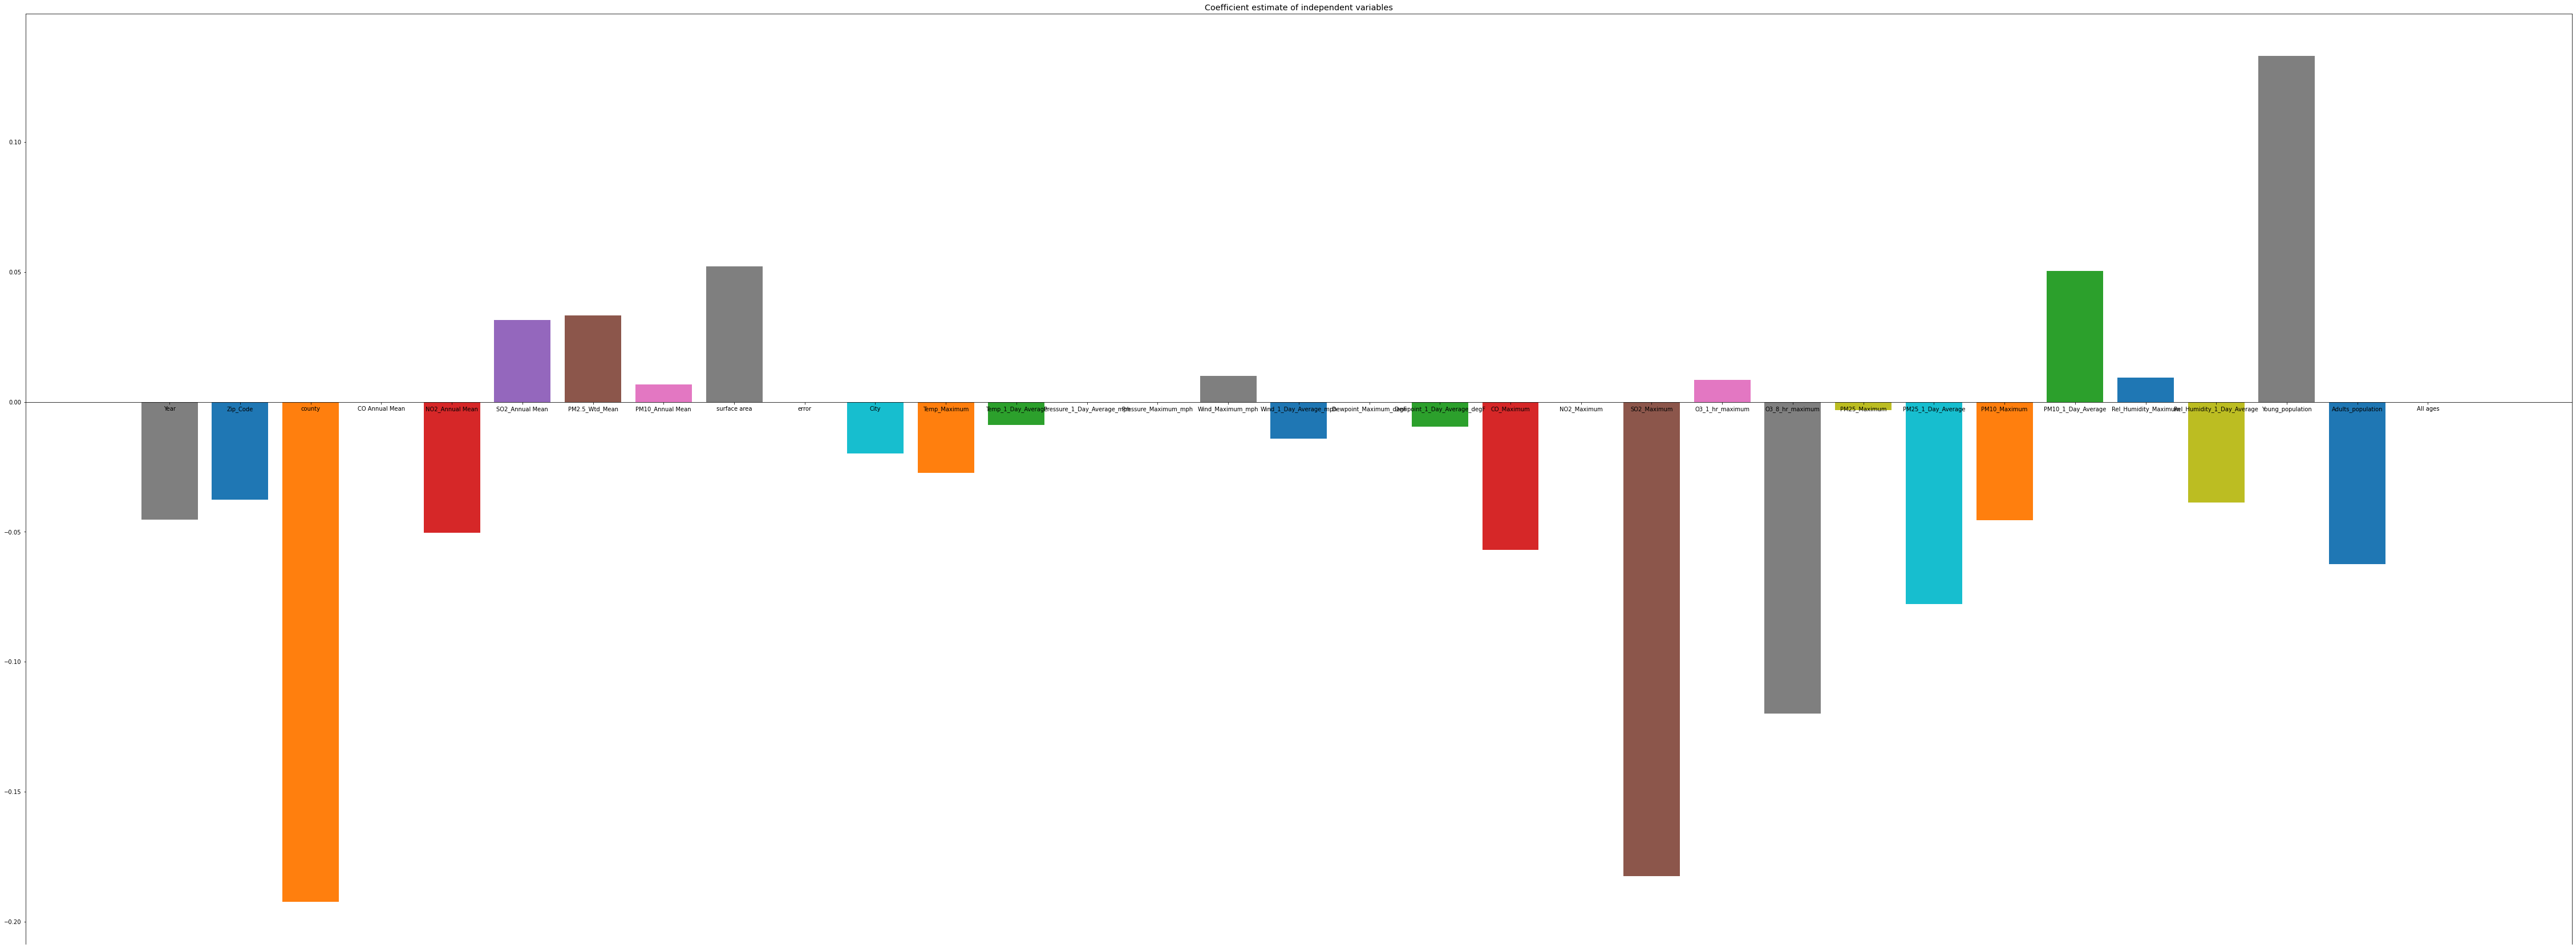

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(80, 30))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(enet_coeff["Columns"],enet_coeff['Coefficient Estimate'],color = color,)
 
ax.spines['bottom'].set_position('zero')

 
plt.style.use('ggplot')
plt.title("Coefficient estimate of independent variables")
plt.show()

# Gradient Boost Regressor

In [ ]:
model= GradientBoostingRegressor()
depth = [10,30,50]
features= [10,20,30]
min_samples_split=[5,10,30,50]
min_samples_leaf=[5,10,30,50]


param_grid =[{'n_estimators': [100,300,500],
             'max_depth':depth,
             'max_features':features,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}]
grid_search = GridSearchCV(estimator = model, param_grid = param_grid,scoring='neg_mean_squared_error',
                           cv=5, n_jobs=-1, verbose=2)
grid_search = grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

In [ ]:
model= GradientBoostingRegressor(max_depth=50, max_features=20, min_samples_leaf=10, min_samples_split=50, n_estimators=100,random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9599245250228958

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean absolute error: 0.023067849457852233
Mean squared error: 0.0015419721859318617
Root mean squared error: 0.03926795367639956
R2 score: 0.9599245250228958


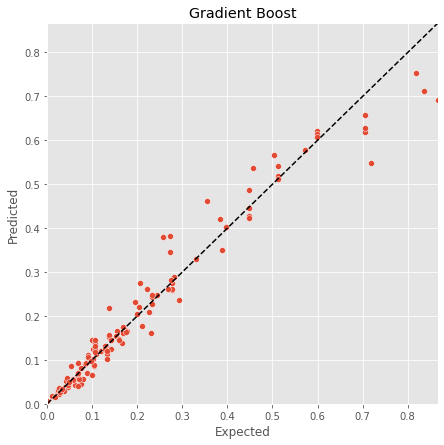

In [ ]:
df = pd.DataFrame()

df['Expected']  = pd.Series(y_test.ravel())
df['Predicted'] = pd.Series(y_pred)

figure = plt.figure(figsize=(7, 7))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                      palette='cool')
start = min(y_test.min(), y_pred.min())
end   = max(y_test.max(), y_pred.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)
axes.set_title('Gradient Boost')


line = plt.plot([start, end], [start, end], 'k--')

#Ensemble model using weighted average 

In [ ]:
model1 = RandomForestRegressor(criterion='mse', max_depth = 50, n_estimators= 100, max_features =20, random_state = 42)
model2 = SVR(kernel='rbf', gamma='auto', C= 100, epsilon= 0.01)
model3= ElasticNet(alpha= 0.0001, l1_ratio=0.5, max_iter =1000, normalize=True)
model4= GradientBoostingRegressor(random_state = 42)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)
pred4=model4.predict(X_test)


finalpred=(pred1*0.3+pred2*0.1+pred3*0.1 + pred4*0.5)
#finalpred=(pred1+pred2+pred3)/3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(finalpred)

[0.05779636 0.05162526 0.63589979 0.08915553 0.2533782  0.58056095
 0.33203674 0.21903349 0.09199669 0.53830301 0.35749068 0.13003151
 0.55302269 0.32829194 0.14960288 0.08033106 0.11920051 0.16344844
 0.25280894 0.45234474 0.05618827 0.12023337 0.05066622 0.02598566
 0.13259785 0.04986098 0.60986828 0.21821133 0.13605116 0.11850581
 0.0552036  0.03005098 0.43450679 0.02676286 0.27868523 0.06840452
 0.52462838 0.31898836 0.13494739 0.50580186 0.05556712 0.58075705
 0.49981445 0.05151289 0.16243439 0.72762647 0.17402093 0.23705835
 0.26901858 0.05006922 0.09948843 0.08461892 0.19504891 0.16164847
 0.07314847 0.10199596 0.54436299 0.18410625 0.02740105 0.14870669
 0.04369808 0.20810569 0.18517591 0.38790576 0.06545799 0.57673114
 0.0923195  0.12975823 0.0664149  0.12345021 0.13927698 0.54077913
 0.04146224 0.1102581  0.06134185 0.16081967 0.13406421 0.11261995
 0.47117378 0.58249259 0.05799656 0.05675752 0.25892355 0.43909521
 0.06045836 0.12230527 0.02811399 0.02994033 0.07313137 0.0969

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, finalpred))
print('Mean squared error:', metrics.mean_squared_error(y_test, finalpred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, finalpred)))
print('R2 score:', metrics.r2_score(y_test, finalpred))

Mean absolute error: 0.026393953151934678
Mean squared error: 0.0017379687739753813
Root mean squared error: 0.04168895266105136
R2 score: 0.9548306222719917


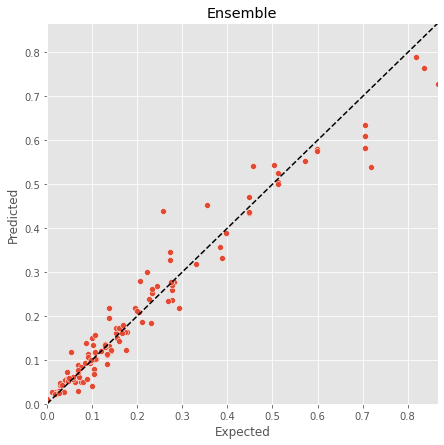

In [ ]:
df = pd.DataFrame()

df['Expected']  = pd.Series(y_test.ravel())
df['Predicted'] = pd.Series(finalpred)

figure = plt.figure(figsize=(7, 7))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                      palette='cool')
start = min(y_test.min(), finalpred.min())
end   = max(y_test.max(), finalpred.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)
axes.set_title('Ensemble')


line = plt.plot([start, end], [start, end], 'k--')

#Ensemble model using VotingRegressor


In [ ]:
er = VotingRegressor([('rfr', model1), ('svr', model2),('enr',model3),('gbr',model4)],weights=[3, 2, 1, 4])
pred_voting=er.fit(X_train,y_train).predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, pred_voting))
print('Mean squared error:', metrics.mean_squared_error(y_test, pred_voting))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred_voting)))
print('R2 score:', metrics.r2_score(y_test, pred_voting))

Mean absolute error: 0.026944738196635277
Mean squared error: 0.0018667852865452974
Root mean squared error: 0.04320631072592634
R2 score: 0.9514827130339183


# Stacked ensemble

In [ ]:
estimators = [('rfr', RandomForestRegressor(criterion='mse', max_depth = 50, n_estimators= 100, max_features =20, random_state = 42)),
              ('svr', SVR(kernel='rbf', gamma='auto', C= 100, epsilon= 0.01)),
              ('enr', ElasticNet(alpha= 0.0001, l1_ratio=0.5, max_iter =1000, normalize=True)),
               ('gbr', GradientBoostingRegressor(n_estimators=500, max_features=20,random_state = 42))]


reg = StackingRegressor(estimators=estimators,final_estimator= LinearRegression())


In [ ]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9607925098855549

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean absolute error: 0.023271907709181687
Mean squared error: 0.0015085749893472957
Root mean squared error: 0.038840378336819734
R2 score: 0.9607925098855549


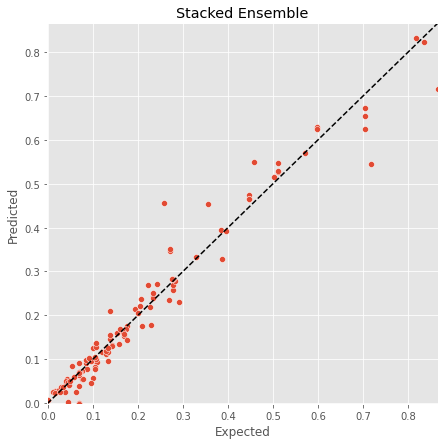

In [ ]:
df = pd.DataFrame()

df['Expected']  = pd.Series(y_test.ravel())
df['Predicted'] = pd.Series(y_pred)

figure = plt.figure(figsize=(7, 7))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                      palette='cool')
start = min(y_test.min(), y_pred.min())
end   = max(y_test.max(), y_pred.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)
axes.set_title('Stacked Ensemble')


line = plt.plot([start, end], [start, end], 'k--')